# Import python libraries necessary

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
import seaborn as sns
sns.set()
%matplotlib inline

# Import the csv

In [2]:
sunspot_data = pd.read_csv('monthly-sunspots.csv', index_col=0, parse_dates=True)

In [3]:
sunspot_data.head()

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


# Plot data

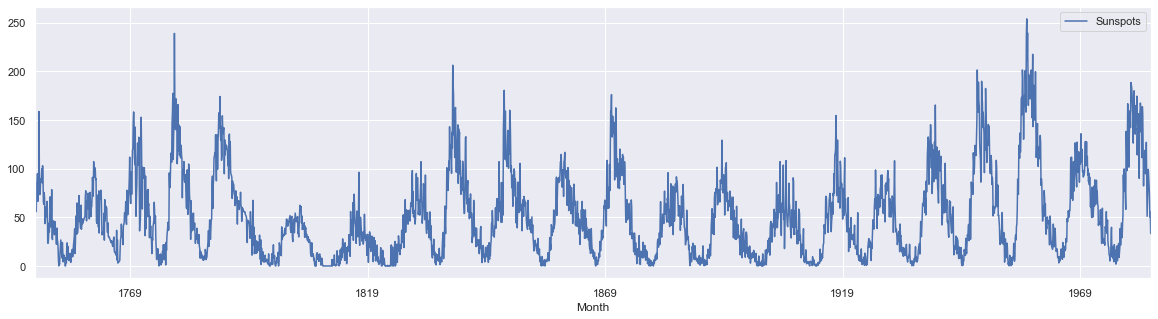

In [4]:
sunspot_data.plot(figsize = (20, 5))

In [5]:
len(sunspot_data)

2820

# Using MA to smoothen noise

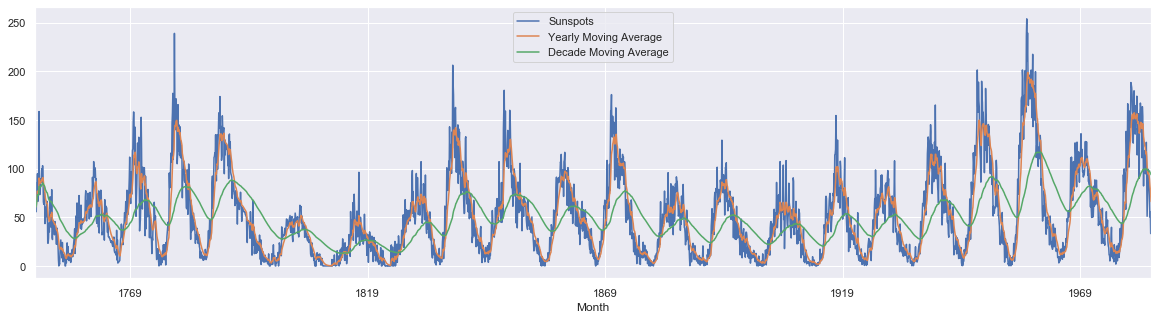

In [6]:
sunspot_data['Yearly Moving Average'] = sunspot_data['Sunspots'].ewm(span=12).mean()
sunspot_data['Decade Moving Average'] = sunspot_data['Sunspots'].ewm(span=120).mean()
sunspot_data.plot(figsize = (20, 5))

# Find seasonal component

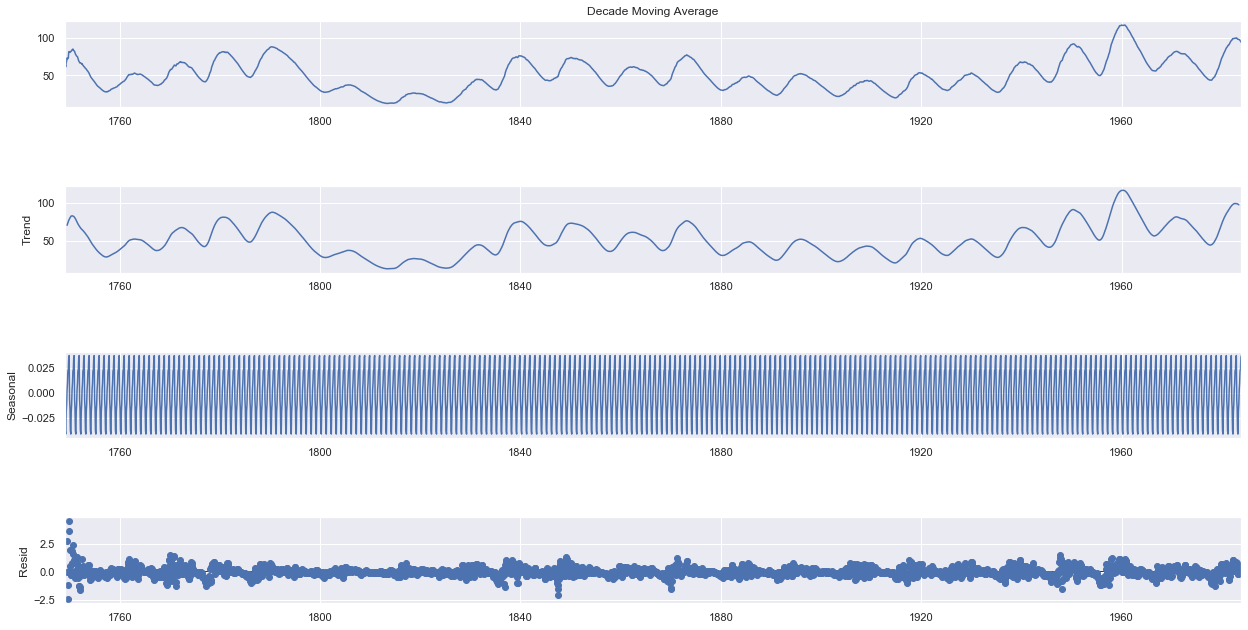

In [7]:
dec_decompose = seasonal_decompose(sunspot_data['Decade Moving Average'].dropna())
fig1 = dec_decompose.plot()
fig1.set_size_inches(20, 10)

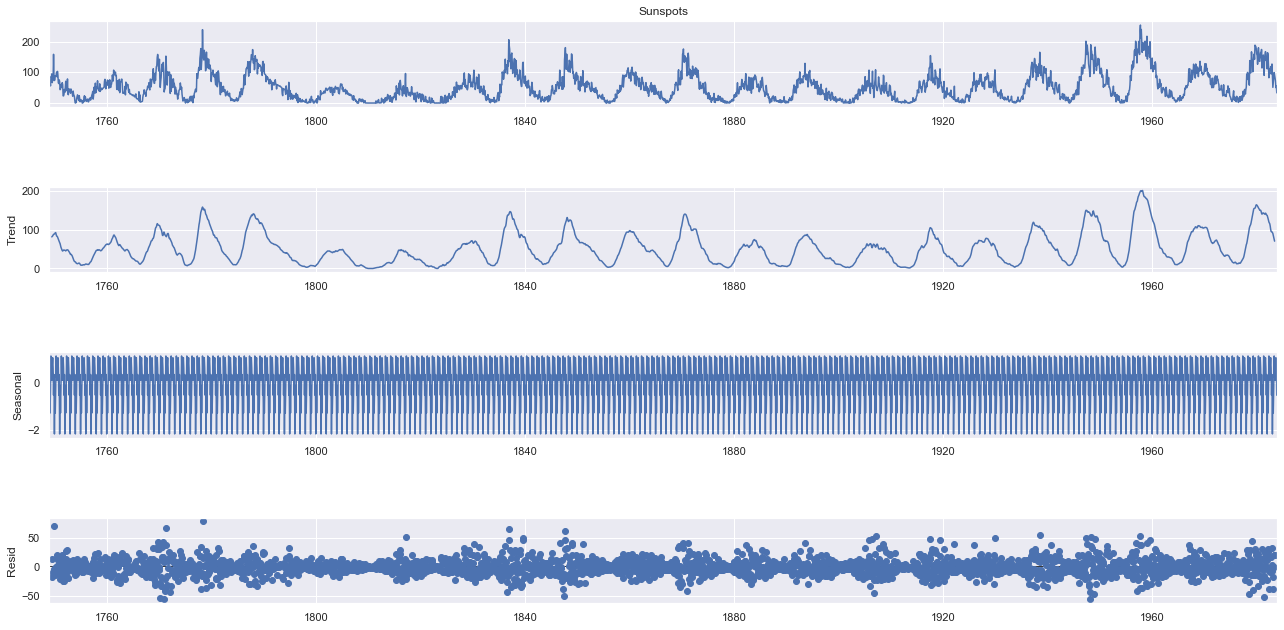

In [8]:
monthly_decompose = seasonal_decompose(sunspot_data['Sunspots'].dropna())
fig1 = monthly_decompose.plot()
fig1.set_size_inches(20, 10)

# Used a small slice for more clarity

Looks like theres a little bit of cyclic trend in there

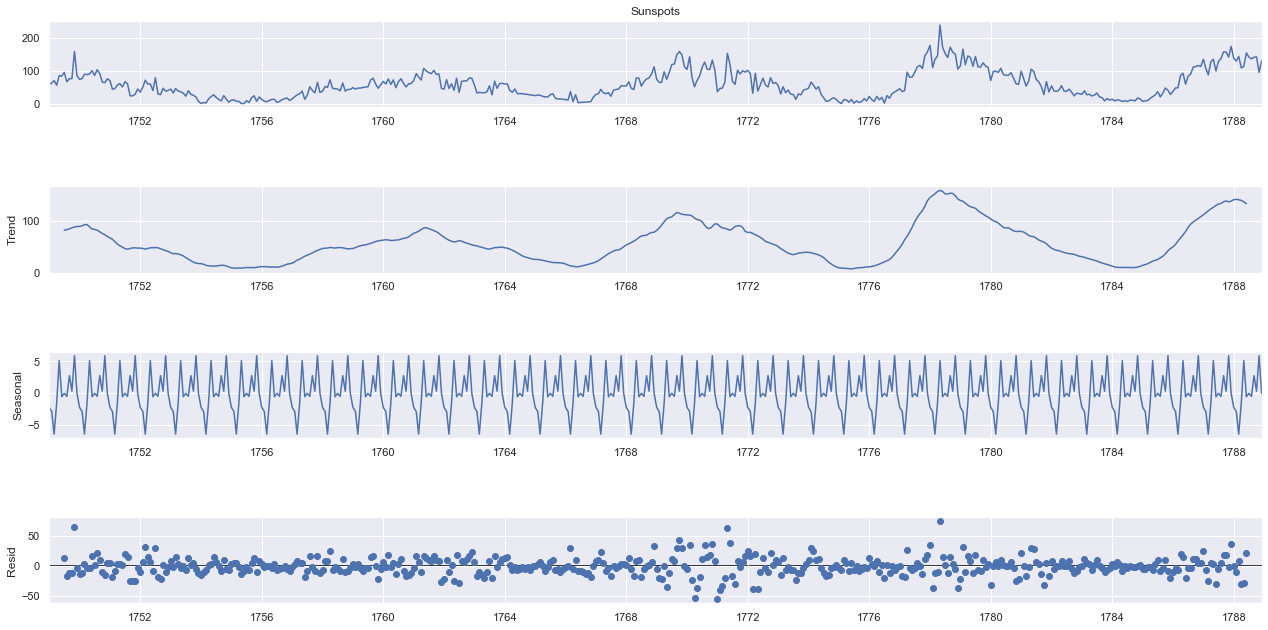

In [9]:
slice_decompose = seasonal_decompose(sunspot_data['Sunspots'][:480].dropna())
fig1 = slice_decompose.plot()
fig1.set_size_inches(20, 10)

# Using AD Fuller as get stationarity test

In [10]:
adfuller(sunspot_data['Sunspots'])

(-9.567667511913088,
 2.333452143866137e-16,
 27,
 2792,
 {'1%': -3.432694313168895,
  '5%': -2.862575752726396,
  '10%': -2.5673213632123297},
 23141.276837258665)

# From above, dataset is stationary

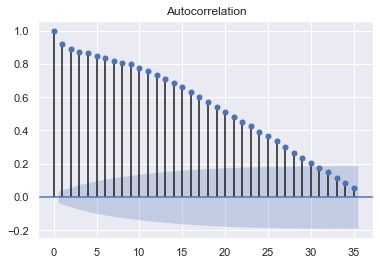

In [11]:
acf = plot_acf(sunspot_data['Sunspots'])

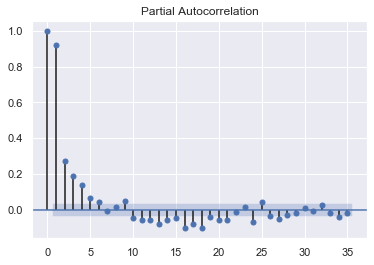

In [12]:
pacf = plot_pacf(sunspot_data['Sunspots'])

# From the PACF graph, looks like an AR(4)

# Order of P <= 4 from PACF

In [13]:
res = sm.tsa.arma_order_select_ic(sunspot_data['Sunspots'], max_ar=4, max_ma=4, ic=['bic', 'aic'])

In [14]:
print(res)


{'bic':               0             1             2             3             4
0  29289.453808  27022.052645  25918.569199  25345.265065  24993.504194
1  23957.607492  23621.909872  23591.106842  23599.044901  23601.909560
2  23748.277297  23594.470776  23599.047640  23491.409188  23481.748468
3  23654.086329  23597.482711  23471.068220  23478.896342  23486.830781
4  23609.943736  23602.042748  23613.125367  23486.412703  23494.076059, 'aic':               0             1             2             3             4
0  29277.564824  27004.219169  25894.791230  25315.542604  24957.837241
1  23939.774015  23598.131903  23561.384381  23563.377948  23560.298115
2  23724.499329  23564.748316  23563.380687  23449.797743  23434.192530
3  23624.363868  23561.815758  23429.456775  23431.340404  23433.330351
4  23574.276783  23560.431303  23565.569430  23432.912274  23434.631137, 'bic_min_order': (3, 2), 'aic_min_order': (3, 2)}


# Best p, q = 3, 2 from above

In [15]:
model32 = ARMA(sunspot_data['Sunspots'][:1861], order=res['bic_min_order'])

C:\Users\souvi\anaconda3\envs\tsa\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [16]:
model32_fit = model32.fit()

In [17]:
predict = model32_fit.predict(start=1861, end=2820)

# Applying prediction models

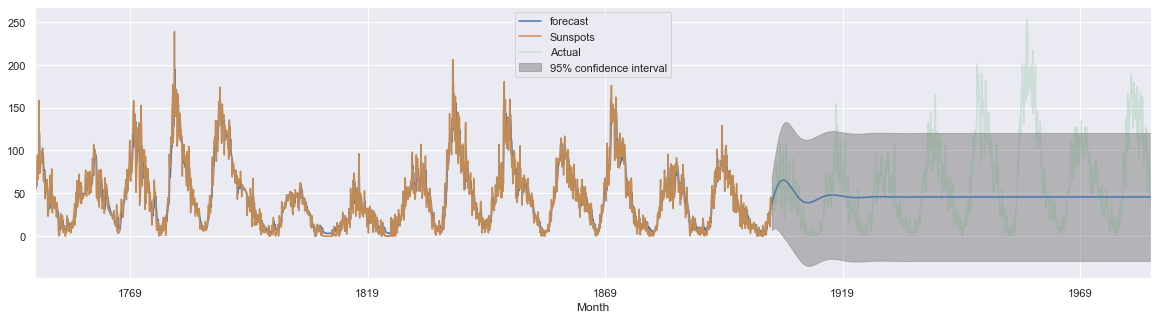

In [18]:
plot_pred = model32_fit.plot_predict(start=0, end=2819)
sunspot_data['Sunspots'].plot(label = 'Actual', figsize=(20, 5), alpha=0.2)
plt.legend()

In [19]:
sunspot_data['Prediction'] = predict

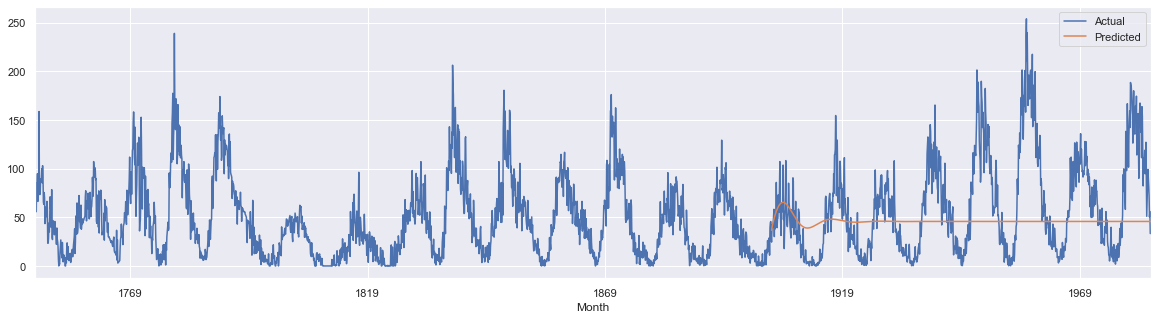

In [20]:
sunspot_data['Sunspots'].plot(label = 'Actual', figsize=(20, 5))
predict.plot(label = 'Predicted')
plt.legend()